## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/home/lucas/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/lucas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


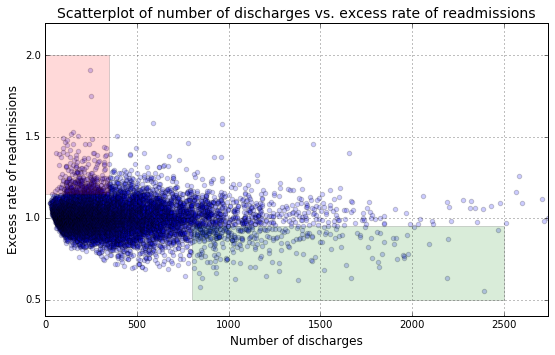

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## My analysis

For a number of reasons, the numbers have to be recalculated:
- The most obvious one is that some other diseases are included.
- The shaded areas don't correspond with the limits stated for (excess readmission ratio) ERR and (SIZE.
- There's an inconsistency in what's defined as "low number of discharges": 100 or 300.

Even when the numbers are re-done:
- There might be lack of acknowledgment of possible biases.
- The logic for the recommendations might be at fault.

(And I prefer simpler variable names.)

So let's start again ...

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

## Clear the dataset

In [6]:
h = pd.read_csv('cms_hospital_readmissions.csv')
h.shape

(16860, 12)

In [7]:
h['Measure Name'].value_counts()

READM-30-PN-HRRP          3372
READM-30-AMI-HRRP         3372
READM-30-HF-HRRP          3372
READM-30-HIP-KNEE-HRRP    3372
READM-30-COPD-HRRP        3372
Name: Measure Name, dtype: int64

We want only "heart attack" (ami = acute myocardial infarction), "heart failure" (hf) and "pneumonia" (pn)".
Not "hip-knee" or "copd" (chronic obstructive pulmonary disease). So we select those:

In [8]:
h = h[h['Measure Name'].isin(['READM-30-PN-HRRP', 'READM-30-AMI-HRRP', 'READM-30-HF-HRRP'])]
h.shape

(10116, 12)

In [9]:
h.columns = ["hospital", "provider", "state", "measure", "numdischarges", "footnote", "excess", \
             "predicted", "expected", "readmissions", "startdate", "enddate"]
#h.numdischarges.value_counts() # "Not Available" = 2669
h = h[(h.numdischarges != 'Not Available') & (h.excess.isnull() == False)]
h = h[['measure', 'numdischarges', 'excess', 'predicted', 'expected', 'readmissions']]
h.shape

(7399, 6)

In [10]:
h2 = h.apply(pd.to_numeric, errors = 'ignore') #numdischarges is not a numeric value, measure must stay as is
h2.head(2)

,measure,numdischarges,excess,predicted,expected,readmissions
35,READM-30-HF-HRRP,281,1.3892,32.8,23.6,113.0
74,READM-30-HF-HRRP,622,1.3170,30.4,23.0,206.0


In [11]:
h2.measure.value_counts()

READM-30-HF-HRRP     2833
READM-30-PN-HRRP     2789
READM-30-AMI-HRRP    1777
Name: measure, dtype: int64

In [12]:
h2.numdischarges.describe()

count    7399.000000
mean      345.857008
std       288.611190
min        25.000000
25%       147.000000
50%       264.000000
75%       454.000000
max      3570.000000
Name: numdischarges, dtype: float64

In [13]:
h2.excess.describe()

count    7399.000000
mean        1.004936
std         0.078113
min         0.699700
25%         0.953450
50%         1.002900
75%         1.056300
max         1.389200
Name: excess, dtype: float64

In [14]:
h2.predicted.describe()

count    7399.000000
mean       19.432356
std         3.415326
min        10.700000
25%        16.700000
50%        19.100000
75%        21.900000
max        32.800000
Name: predicted, dtype: float64

In [15]:
h2.expected.describe()

count    7399.000000
mean       19.311150
std         2.867425
min        12.300000
25%        16.900000
50%        18.700000
75%        22.000000
max        28.000000
Name: expected, dtype: float64

In [16]:
h2.readmissions.describe()

count    7399.000000
mean       68.377619
std        63.380619
min        11.000000
25%        27.000000
50%        49.000000
75%        87.000000
max       879.000000
Name: readmissions, dtype: float64

## Re-run the report

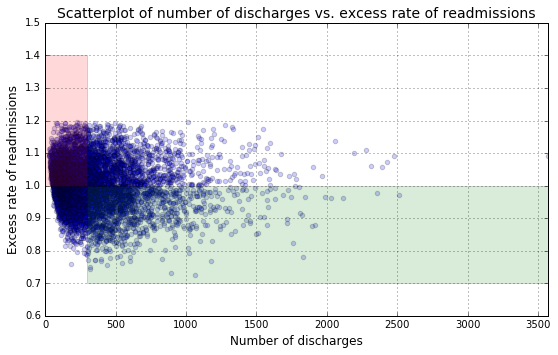

In [17]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in h2['numdischarges'][81:-3]]

y = list(h2['excess'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,300], 1.0, 1.4, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([300,3570], .7, 1.0, facecolor='green', alpha = .15, interpolate=True) #0.699

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [18]:
h = h2
few_discharges = h[h['numdischarges'] < 100]
few_with_great_err = few_discharges[few_discharges['excess'] > 1]
few_proportion_of_err = (len(few_with_great_err) * 1.0 / len(few_discharges))

many_discharges = h[h['numdischarges'] > 1000]
many_with_great_err = many_discharges[many_discharges['excess'] > 1]
many_proportion_of_err = (len(many_with_great_err) * 1.0 / len(many_discharges))

print "HOSPITALS WITH 100 DISCHARGES OR LESS:"
print "- EXCESS (said to be 1.023, OK):", few_discharges['excess'].mean()
print "- % of hospitals with excess > 1 (said to be 63%, NOT OK):", few_proportion_of_err
print "HOSPITALS WITH 1000 DISCHARGES OR MORE:"
print "- EXCESS (said to be 0.978, NOT OK):", many_discharges['excess'].mean()
print "- % of hospitals with excess > 1 (said to be 44%, NOT OK)", many_proportion_of_err

HOSPITALS WITH 100 DISCHARGES OR LESS:
- EXCESS (said to be 1.023, OK): 1.0235336293
- % of hospitals with excess > 1 (said to be 63%, NOT OK): 0.663706992231
HOSPITALS WITH 1000 DISCHARGES OR MORE:
- EXCESS (said to be 0.978, NOT OK): 0.999648301887
- % of hospitals with excess > 1 (said to be 44%, NOT OK) 0.490566037736


Looking at the numbers, it seems as if the "FEW" hospitals are worse off: 66% have an "excess" > 1, and of course their average is higher than 1. The "MANY" hospitals seem to have better indicators: only 44% of them have an "excess" > 1, and their average is less than 1.

First we'd have to check that this is significant. Then, we'd have to see what this might mean, and what to do about it.

## Significance

### Difference in "excess" ratio

"FEW" hospitals have an average of 1.023, while "MANY" have an average of 0.978. Is that significant?

In [19]:
from scipy.stats import ttest_ind
ttest_ind(few_discharges['excess'], many_discharges['excess'])

Ttest_indResult(statistic=5.5582023638090652, pvalue=3.3772852131878623e-08)

Given the small size of the p-value, the difference seams to be significant.

### Difference in "percentage of hospitals with excess > 1"

"FEW" hospitals have 66% hospitals in this category, while "MANY" have only 44%. Is that significant?

In [20]:
n1 = len(few_discharges)
n2 = len(many_discharges)
p1 = len(few_with_great_err) * 1.0 / n1
p2 = len(many_with_great_err) * 1.0 / n2

p = p1 - p2
stderr = np.sqrt(p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2)
z = 1.96
confidence_interval = [p - z * stderr, p + z * stderr]
confidence_interval

[0.14044357741921351, 0.20583833157079759]

The interval doesn't include the zero, so we can be 95% confident that the difference in proportions is real.

## Meaning and possible actions

With the information available, I cannot tell why the "FEW" hospitals are worse off:
- Are they "FEW" because they have fewer beds? Smaller, regional hospitals, maybe with less resources: less experienced doctors and nurses, less equipement and money.
- Are they "FEW" because they have a different case mix? Diseases which, even for the same category, are more severe or in patients with more tendency to complications (older, etc).

Can we rule out the second possibility? The "expected" has been calculated from "similar hospitals", but maybe the two groups are different. Possibly in the mix of diseases they treat?

The "FEW" hospitals have more myocardial infarctions, while the "MANY" have more heart failure:

In [21]:
few_discharges.measure.value_counts(normalize = True)

READM-30-AMI-HRRP    0.425083
READM-30-HF-HRRP     0.372919
READM-30-PN-HRRP     0.201998
Name: measure, dtype: float64

In [22]:
many_discharges.measure.value_counts(normalize = True)

READM-30-HF-HRRP     0.671698
READM-30-PN-HRRP     0.211321
READM-30-AMI-HRRP    0.116981
Name: measure, dtype: float64

But then myocardial infarctions do have a higher "excess" than heart failures, so the "excess" may be taking that into account:

In [23]:
h2[h2.measure == "READM-30-AMI-HRRP"].excess.describe()

count    1777.000000
mean        1.007526
std         0.075921
min         0.723800
25%         0.957800
50%         1.009100
75%         1.058500
max         1.253800
Name: excess, dtype: float64

In [24]:
h2[h2.measure == "READM-30-HF-HRRP"].excess.describe()

count    2833.00000
mean        1.00346
std         0.08126
min         0.69970
25%         0.94940
50%         1.00140
75%         1.05720
max         1.38920
Name: excess, dtype: float64

## Possible actions

If the "FEW" are "simpler" (smaller and with less qualified staff), then maybe we could look at giving them more resources: people, time, knowledge, access to expertise, etc.

If they handle a different case mix (which might or might not be the case), then I don't think we can really know what to do with the hospitals themselves.

It could of course be a combination of both factors.